In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt


In [22]:
# Example using breast cancer dataset (if you're using that)
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

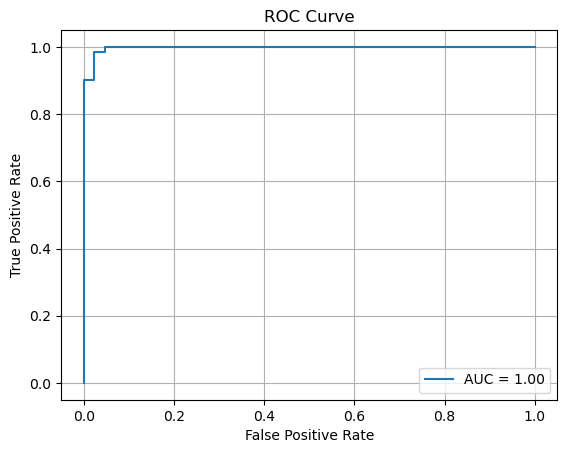

In [30]:
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


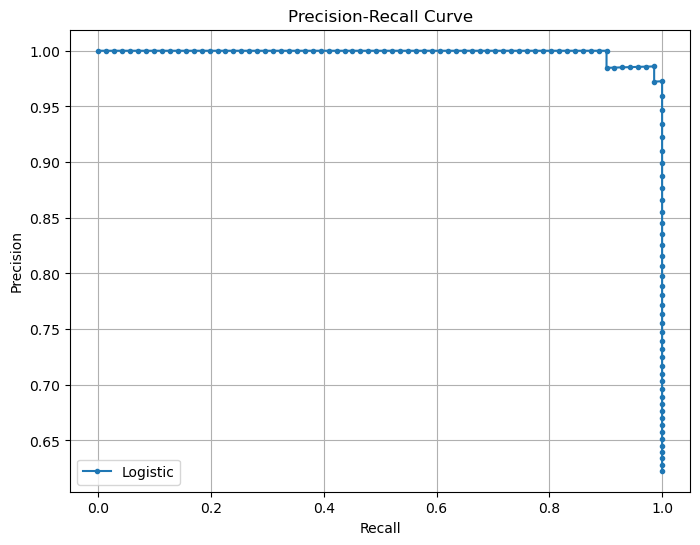

Average Precision Score: 0.9983796759737475


In [32]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Predict probabilities again (already done previously, but re-running for safety)
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()

# Optional: Average Precision Score
ap_score = average_precision_score(y_test, y_probs)
print("Average Precision Score:", ap_score)


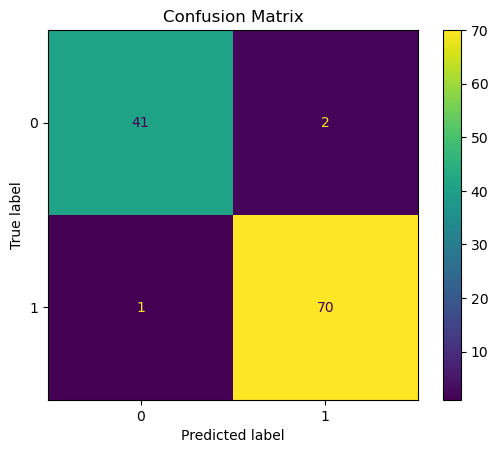

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()
